# Project 2 - Problem 3

#### Let C be the intersection of the surface $x^2+y^2+z^2=9$ and the cylinder $x^2+3y^2=4$, $z>0$

---

## (a) Draw the surface and the curve C

C is intersection:

$\quad \quad \: x^2+y^2+z^2-9=x^2+3y^2-4$

$\quad \Leftrightarrow 2y^2-z^2+5=0$

Change to polar cordinate: 

$\quad
\begin{cases}
  x = 3\sin\theta\sin\alpha \\
  y = 3\sin\theta\cos\alpha \\
  z = 3\cos\theta
\end{cases}$

$\quad \Rightarrow 2(3\sin\theta\cos\alpha)^2-(3\cos\theta)^2+5=0$

$\quad \Leftrightarrow 18\sin^2\theta \cos^2\alpha-9(1-\sin^2\theta)+5=0$

$\quad \Leftrightarrow 9\sin^2\theta(1+2sin^2\alpha)=4$

$\quad \Leftrightarrow \sin\theta = \sqrt{\frac{4}{9(1+2\sin^2\alpha)}}$

$\quad \Rightarrow \cos\theta = \sqrt{1-\frac{4}{9(1+2\sin^2\alpha)}} = \sqrt{\frac{5+18\sin^2\alpha}{9(1+2\sin^2\alpha)}}$

The intersection function:

$ \quad C = 
\begin{cases}
  x = \frac{2\cos\alpha}{\sqrt{1+2\sin^2\alpha}} \\
  \\
  y = \frac{2\sin\alpha}{\sqrt{1+2\sin^2\alpha}} & \quad \text{with} \quad \alpha \in [0,2\pi] \\
  \\
  z = \sqrt{\frac{5+18\sin^2\alpha}{(1+2\sin^2\alpha)}}
\end{cases}$

/tmp/ipykernel_3440/166107388.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('viridis_r'),linewidth=0.0,edgecolor='black',


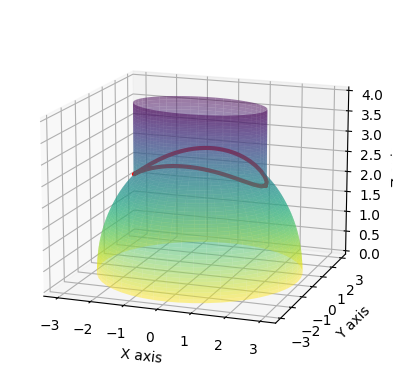

In [7]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
from mpl_toolkits import mplot3d

# Set figure and axes for plotting
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Plot surface created by union of sphere and cylinder
dt = 50
alpha = np.linspace(0,2*np.pi,dt)   # Create an array of alpha
z = np.linspace(0,4,dt)             # Create an array of z
alpha,z = np.meshgrid(alpha,z)      # Creat a meshgrid of alpha and z
x = []                              # Blank list of x
y = []                              # Blank list of y
alpha = np.ravel(alpha)             # Change dimenseion of alpha from 2 to 1
z = np.ravel(z)                     # Change dimension of z from 2 to 1

# Union sphere and cylinder
for i in range(dt**2):
    if z[i] > 3:
        x.append(2*np.cos(alpha[i]))                    # x cylinder
        y.append((2/np.sqrt(3))*np.sin(alpha[i]))       # y cylinder
    else:
        delta = np.arccos(z[i]/3) - np.arcsin(2/(3*np.sqrt(1+2*(np.sin(alpha[i])**2))))
        if delta >= 0:
            x.append(3*np.sin(np.arccos(z[i]/3))*np.cos(alpha[i]))          # x sphere
            y.append(3*np.sin(np.arccos(z[i]/3))*np.sin(alpha[i]))          # y sphere
        elif delta < 0:
            x.append(2*np.cos(alpha[i]))                                    # x cylinder
            y.append((2/np.sqrt(3))*np.sin(alpha[i]))                       # y cylinder

Xs = np.array(x).reshape(dt,dt)             # Reshape dimension of x from 1 back to 2
Ys = np.array(y).reshape(dt,dt)             # Reshape dimension of y from 1 back to 2
Zs = z.reshape(dt,dt)                       # Reshape dimesnion of z from 1 back to 2
# Plot suface to firgure
ax.plot_surface(Xs,Ys,Zs,rstride=1, cstride=1, 
                cmap=cm.get_cmap('viridis_r'),linewidth=0.0,edgecolor='black',
                antialiased=True,rasterized=False, alpha=0.7)

# Plot intersection curve C
dt = 50
alpha = np.linspace(0,2*np.pi,dt)                                  # Create a value array of alpha
#theta = np.arcsin(2/(3*np.sqrt(1+2*(np.sin(alpha)**2))))
#x = 3*np.sin(theta)*np.cos(alpha)
#y = 3*np.sin(theta)*np.sin(alpha)
#z = 3*np.cos(theta)
Xc = (2/(np.sqrt(1+2*np.sin(alpha)**2)))*np.cos(alpha) 
Yc = (2/(np.sqrt(1+2*np.sin(alpha)**2)))*np.sin(alpha)
Zc = np.sqrt((5+18*np.sin(alpha)**2)/(1+2*np.sin(alpha)**2))
ax.plot3D(Xc,Yc,Zc,color='red',alpha=1,linewidth=2)                 # Plot curve C to figure

ax.view_init(elev=20.,azim=-70.)
plt.show()

## (b) Find the length of the figure

Intersection curve:

$ \quad C = 
\begin{cases}
  x = \frac{2\cos\alpha}{\sqrt{1+2\sin^2\alpha}} \\
  \\
  y = \frac{2\sin\alpha}{\sqrt{1+2\sin^2\alpha}} & \quad \text{with} \quad \alpha \in [0,2\pi] \\
  \\
  z = \sqrt{\frac{5+18\sin^2\alpha}{(1+2\sin^2\alpha)}}
\end{cases}$

Paritial derivative respect to $\alpha$:

$\quad \frac{\delta x}{\delta \alpha} = -\frac{2\sin\alpha}{\sqrt{2\sin^2\alpha+1}} - \frac{4\sin\alpha\cos^2\alpha}{(2\sin^2\alpha+1)^\frac{3}{2}}$

$\quad \frac{\delta y}{\delta \alpha} = \frac{2\cos\alpha}{\sqrt{2\sin^2\alpha+1}} - \frac{4\sin^2\alpha\cos\alpha}{(2\sin^2\alpha+1)^\frac{3}{2}}$

$\quad \frac{\delta z}{\delta \alpha} = \frac{8\sin(2\alpha)}{64\cos(2\alpha) + 9\cos(4\alpha) + 65}\sqrt{\frac{14-9\cos(2\alpha)}{2-\cos(2\alpha)}}$

Length of curve:

$\quad arc\_length = \int_0^{2\pi}\sqrt{(\frac{\delta x}{\delta \alpha})^2+(\frac{\delta y}{\delta \alpha})^2+(\frac{\delta z}{\delta \alpha})^2} \; d\alpha \approx 10.367$

In [2]:
import numpy as np

dt = 1000000
alpha = np.linspace(0,2*np.pi,dt)                               # Create a value array of alpha
x = (2/(np.sqrt(1+2*np.sin(alpha)**2)))*np.cos(alpha)           # Calculate x
y = (2/(np.sqrt(1+2*np.sin(alpha)**2)))*np.sin(alpha)           # Calculate y
z = np.sqrt((5+18*np.sin(alpha)**2)/(1+2*np.sin(alpha)**2))     # Calculate z
dx = np.diff(x)                                                 # Differential x
dy = np.diff(y)                                                 # Differential y
dz = np.diff(z)                                                 # Differential z
length = np.trapz(np.sqrt(dx**2 + dy**2 + dz**2))               # Intergrate
print('Length: {}'.format(length))                              # Print length

Length: 10.367666158156583


---

## (c) At any given point belongs to the curve draw the unit tangent vector

Vector gradient of C:

$\nabla C = \begin{bmatrix} 
\frac{\delta x}{\delta \alpha}  \\ 
\\
\frac{\delta y}{\delta \alpha}  \\
\\
\frac{\delta z}{\delta \alpha}  
\end{bmatrix}$

Unit tangent vector:

$T = \frac{\nabla}{arc\_length}$

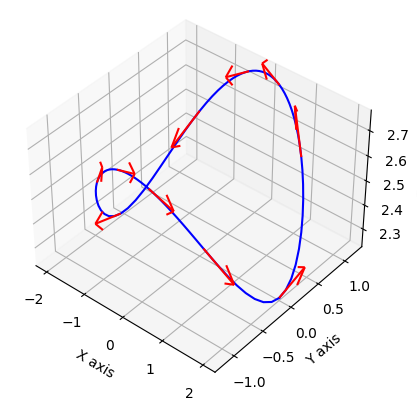

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Define the parameter t
dt = 100
alpha = np.linspace(0,2*np.pi,dt)

# Define the x, y, and z functions
x = 3*(2/(3*np.sqrt(1+2*np.sin(alpha)**2)))*np.cos(alpha)
y = 3*(2/(3*np.sqrt(1+2*np.sin(alpha)**2)))*np.sin(alpha)
z = 3*np.sqrt((5+18*np.sin(alpha)**2)/(9*(1+2*np.sin(alpha)**2)))

# Calculate the tangent vector of the curve
dx = np.diff(x)
dy = np.diff(y)
dz = np.diff(z)
norm = np.sqrt(dx**2 + dy**2 + dz**2)
tx, ty, tz = dx/norm, dy/norm, dz/norm

# Pick 10 points from arrays
x_pos = x[::10]
y_pos = y[::10]
z_pos = z[::10]
tx_pos = tx[::10]
ty_pos = ty[::10]
tz_pos = tz[::10]

# Plot the curve and the tangent vectors in 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev = 40., azim = 310.)
ax.plot3D(x,y,z,color='blue')
ax.quiver(x_pos, y_pos, z_pos, tx_pos, ty_pos, tz_pos, color='red', length=0.5, normalize=True)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()